In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import matplotlib.pyplot as plt

import numpy as np

from mcopt.pipeline import Pipeline
from mcopt import MorseGraph, ot
import unbalancedgw

/workspaces/MCOpt/mcopt/pipeline/pipeline.py:34: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import tqdm


In [3]:
pipeline = Pipeline('../pipeline.config.json')

wind = pipeline.graph('wind')

> Generating wind graph
  config unchanged, loading graph
  loaded 15 frames


In [39]:
src = wind.frames[0]
dest = wind.frames[1]

src_net = src.to_mpn(hist='uniform', dist='step')
dest_net = dest.to_mpn(hist='uniform', dist='step')

In [40]:
coupling, dist = ot.uGW(src_net, dest_net)

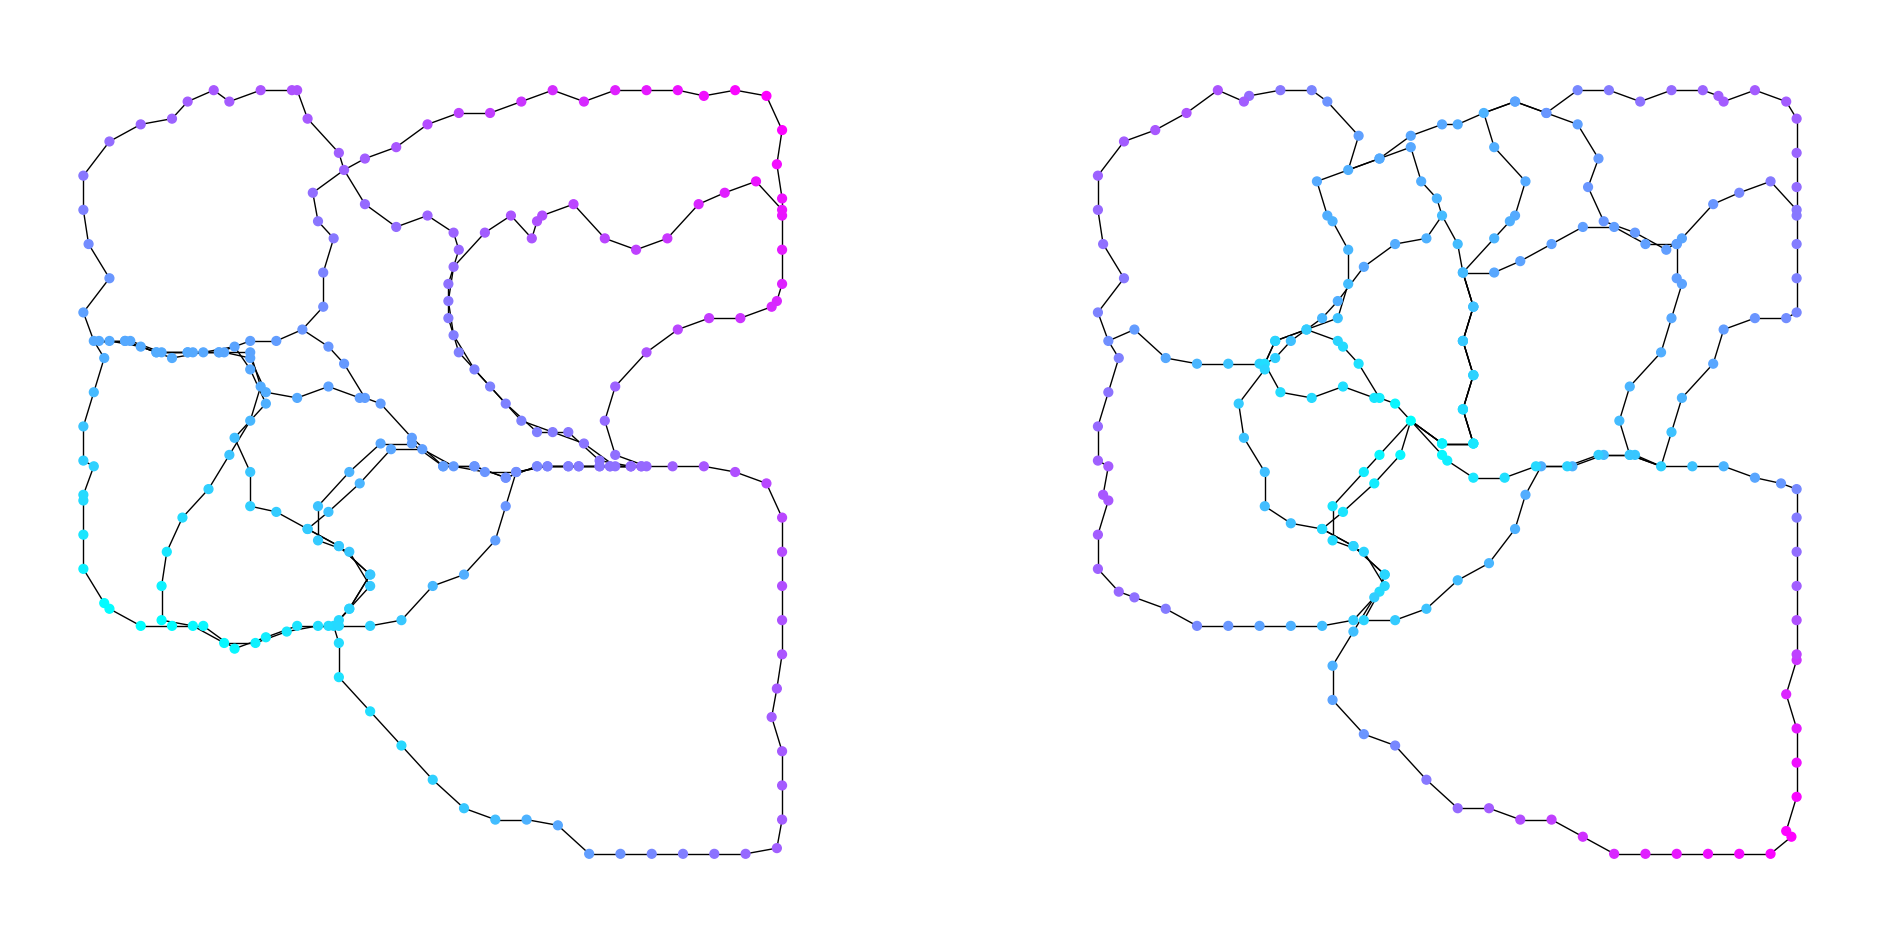

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(2 * 12, 12))

src_node_color = src.node_color_by_position()
src.draw(
  ax=axes[0],
  cmap='cool',
  node_color=src_node_color
)

dest.draw(
  ax=axes[1],
  cmap='cool',
  node_color=dest.node_color_by_coupling_int(src_node_color, coupling)
)